# Imports

In [1]:
import time
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import itertools
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
sync_timings = list(pd.to_datetime(['2021-07-21T01:40:12', '2021-07-21T01:36:06',
       '2021-07-21T01:32:20', '2021-07-21T01:28:46',
       '2021-07-21T01:25:24', '2021-07-21T01:18:48',
       '2021-07-21T01:14:52', '2021-07-21T01:11:17',
       '2021-07-21T01:07:51']))
base_timings = list(pd.to_datetime(['2021-07-21T01:37:44', '2021-07-21T01:34:09',
       '2021-07-21T01:30:33', '2021-07-21T01:27:08',
       '2021-07-21T01:23:47', '2021-07-21T01:19:58',
       '2021-07-21T01:16:22', '2021-07-21T01:12:47',
       '2021-07-21T01:09:06']))

In [23]:
# Load Data
df_base = pd.read_csv("data/20210721/monitoring_experiment-baseline-with-latency-3.csv")
df_base.set_index('timestamp', inplace=True)
df_base.index = pd.to_datetime(df_base.index)

first = True
for col in df_base.columns: 
    if col.startswith("cpu_"):
        if first:
            df_base["cpu"] = df_base[col]    
        else:
            df_base["cpu"] += df_base[col]

df_sync = pd.read_csv("data/20210721/monitoring_experiment-syncmesh-with-latency-3.csv")
df_sync.set_index('timestamp', inplace=True)
df_sync.index = pd.to_datetime(df_sync.index)

first = True
for col in df_sync.columns: 
    if col.startswith("cpu_"):
        if first:
            df_sync["cpu"] = df_sync[col]    
        else:
            df_sync["cpu"] += df_sync[col]

df_sync.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2021-07-21 01:44:00 to 2021-07-21 00:58:00
Data columns (total 21 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   cpu_util_experiment-syncmesh-with-latency-3-node-instance-2    47 non-null     float64
 1   io_read_experiment-syncmesh-with-latency-3-node-instance-2     47 non-null     int64  
 2   io_write_experiment-syncmesh-with-latency-3-node-instance-2    47 non-null     int64  
 3   iops_read_experiment-syncmesh-with-latency-3-node-instance-2   47 non-null     int64  
 4   iops_write_experiment-syncmesh-with-latency-3-node-instance-2  47 non-null     int64  
 5   cpu_util_experiment-syncmesh-with-latency-3-node-instance-3    47 non-null     float64
 6   io_read_experiment-syncmesh-with-latency-3-node-instance-3     47 non-null     int64  
 7   io_write_experiment-syncme

# Single

## CPU

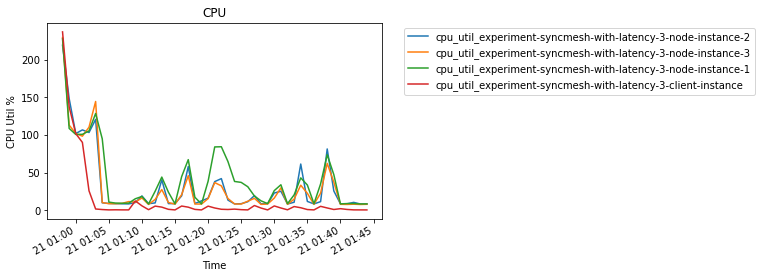

In [8]:
df = pd.read_csv("data/20210721/monitoring_experiment-syncmesh-with-latency-3.csv")
columns = df.columns
df.set_index('timestamp', inplace=True)
df.index = pd.to_datetime(df.index)

fig, ax = plt.subplots()

# ax.set_ylim(0,500)
for col in columns: 
    if col.startswith("cpu_"):
        ax.plot(df.index, df[col]*100, label=col)
# set title and legend
ax.set_title('CPU')
ax.set_ylabel("CPU Util %")
ax.set_xlabel("Time")
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
fig.autofmt_xdate()

fig.savefig("out/cpu_util.png")
plt.show()

## IO

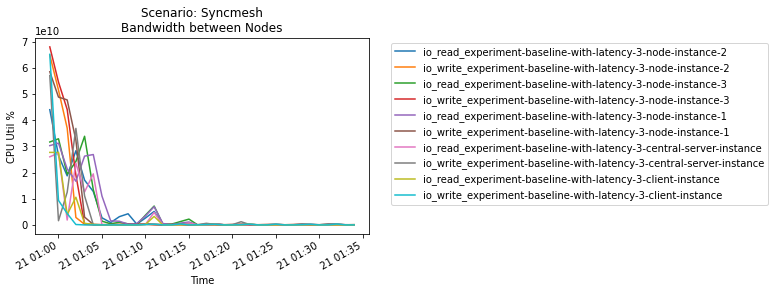

In [6]:
df = pd.read_csv("data/20210721/monitoring_experiment-baseline-with-latency-3.csv")
df.set_index('timestamp', inplace=True)
df.index = pd.to_datetime(df.index)

fig, ax = plt.subplots()

# ax.set_ylim(0,500)
for col in columns: 
    if col.startswith("io_"):
        ax.plot(df.index, df[col]*100, label=col)
# set title and legend
ax.set_title('Scenario: Syncmesh\nBandwidth between Nodes')
ax.set_ylabel("CPU Util %")
ax.set_xlabel("Time")
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
fig.autofmt_xdate()

fig.savefig("out/cpu_util.png")
plt.show()

## IOPS

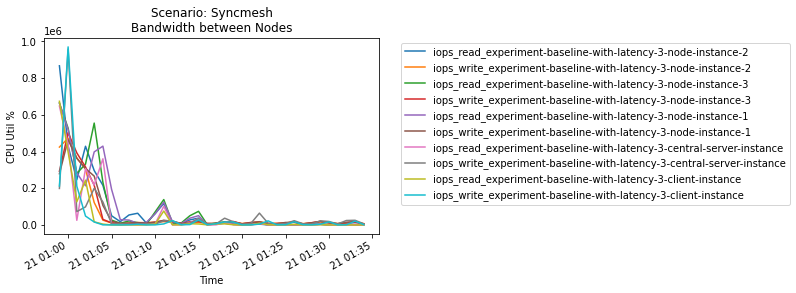

In [5]:
df = pd.read_csv("data/20210721/monitoring_experiment-baseline-with-latency-3.csv")
df.set_index('timestamp', inplace=True)
df.index = pd.to_datetime(df.index)

fig, ax = plt.subplots()

# ax.set_ylim(0,500)
for col in columns: 
    if col.startswith("iops_"):
        ax.plot(df.index, df[col]*100, label=col)
# set title and legend
ax.set_title('Scenario: Syncmesh\nBandwidth between Nodes')
ax.set_ylabel("CPU Util %")
ax.set_xlabel("Time")
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
fig.autofmt_xdate()

fig.savefig("out/cpu_util.png")
plt.show()

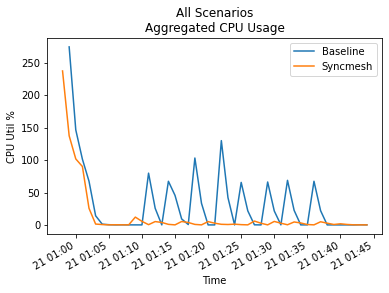

In [37]:
df = pd.read_csv("data/20210721/monitoring_experiment-baseline-with-latency-3.csv")
df.set_index('timestamp', inplace=True)
df.index = pd.to_datetime(df.index)

fig, ax = plt.subplots()

# ax.set_ylim(0,500)
ax.plot(df_base.index, df_base["cpu"]*100, label="Baseline")
ax.plot(df_sync.index, df_sync["cpu"]*100, label="Syncmesh")
# set title and legend
ax.set_title('All Scenarios\nAggregated CPU Usage')
ax.set_ylabel("CPU Util %")
ax.set_xlabel("Time")
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
ax.legend()
fig.autofmt_xdate()

fig.savefig("out/cpu_util.png")
plt.show()

# Comparison

In [49]:
experiments = {}

# Sliding window:
n = 2
base_windows = [base_timings[i:i+n] for i in range(len(base_timings)-n+1)]
sync_windows = [sync_timings[i:i+n] for i in range(len(sync_timings)-n+1)]

i = 0
for base_window, sync_window in zip(base_windows, sync_windows):
    # experiment = {}
    print(base_window)
    df_base_window = df_base.loc[str(base_window[0]):str(base_window[1])]
    df_sync_window = df_sync.loc[str(sync_window[0]):str(sync_window[1])]
    # print(df_base_window.info())
    experiments[i] = {}
    experiments[i]["baseAggregateCPU"] =  df_base_window["cpu"].mean()*100
    experiments[i]["syncAggregateCPU"] =  df_sync_window["cpu"].mean()*100
    i += 1

# timedfbaseline.info()
print(experiments)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,5))
cases = ['Baseline', 'Syncmesh']
values1 = [experiments[0]["baseAggregateCPU"], experiments[0]["syncAggregateCPU"]]
values2 = [experiments[1]["baseAggregateCPU"], experiments[1]["syncAggregateCPU"]]
values3 = [experiments[2]["baseAggregateCPU"], experiments[2]["syncAggregateCPU"]]
values4 = [experiments[3]["baseAggregateCPU"], experiments[3]["syncAggregateCPU"]]
fig.suptitle('Median CPU Usage\nScenario: Collect')
ax1.bar(cases,values1)
ax1.set_title('30 Days')
ax1.set_ylabel("CPU Util %")
# ax1.set_yticklabels([to_human_readable(v) if v >= 0 else ' ' for v in  
#                     ax.get_yticks(minor=False)])
ax2.bar(cases,values2)
ax2.set_title('14 Days')
ax2.set_ylabel("CPU Util %")
# ax2.set_yticklabels([to_human_readable(v) if v >= 0 else ' ' for v in  
                    # ax.get_yticks(minor=False)])
ax3.bar(cases,values3)
ax3.set_title('7 Days')
ax3.set_ylabel("CPU Util %")
# ax3.set_yticklabels([to_human_readable(v) if v >= 0 else ' ' for v in  
                    # ax.get_yticks(minor=False)])
ax4.bar(cases,values4)
ax4.set_title('1 Day')
ax4.set_ylabel("CPU Util %")
# ax4.set_yticklabels([to_human_readable(v) if v >= 0 else ' ' for v in  
                    # ax.get_yticks(minor=False)])
# ax.set_ylabel("Bytes")
# ax.set_xlabel("Time")
fig.savefig("out/cpu_comparison_collect.png")
plt.show()

[Timestamp('2021-07-21 01:37:44'), Timestamp('2021-07-21 01:34:09')]
[Timestamp('2021-07-21 01:34:09'), Timestamp('2021-07-21 01:30:33')]
[Timestamp('2021-07-21 01:30:33'), Timestamp('2021-07-21 01:27:08')]
[Timestamp('2021-07-21 01:27:08'), Timestamp('2021-07-21 01:23:47')]
[Timestamp('2021-07-21 01:23:47'), Timestamp('2021-07-21 01:19:58')]
[Timestamp('2021-07-21 01:19:58'), Timestamp('2021-07-21 01:16:22')]
[Timestamp('2021-07-21 01:16:22'), Timestamp('2021-07-21 01:12:47')]
[Timestamp('2021-07-21 01:12:47'), Timestamp('2021-07-21 01:09:06')]
{0: {'baseAggregateCPU': 30.198450402222537, 'syncAggregateCPU': 3.0002353113616502}, 1: {'baseAggregateCPU': 23.264362304429117, 'syncAggregateCPU': 2.578469280133729}, 2: {'baseAggregateCPU': 29.646512671912635, 'syncAggregateCPU': 2.607269385964776}, 3: {'baseAggregateCPU': 22.281439173564856, 'syncAggregateCPU': 3.3854914478879996}, 4: {'baseAggregateCPU': 43.38814271705162, 'syncAggregateCPU': 2.095883422481088}, 5: {'baseAggregateCPU': 46

[Timestamp('2021-07-21 01:37:44'), Timestamp('2021-07-21 01:34:09')]
[Timestamp('2021-07-21 01:34:09'), Timestamp('2021-07-21 01:30:33')]
[Timestamp('2021-07-21 01:30:33'), Timestamp('2021-07-21 01:27:08')]
[Timestamp('2021-07-21 01:27:08'), Timestamp('2021-07-21 01:23:47')]
[Timestamp('2021-07-21 01:23:47'), Timestamp('2021-07-21 01:19:58')]
[Timestamp('2021-07-21 01:19:58'), Timestamp('2021-07-21 01:16:22')]
[Timestamp('2021-07-21 01:16:22'), Timestamp('2021-07-21 01:12:47')]
[Timestamp('2021-07-21 01:12:47'), Timestamp('2021-07-21 01:09:06')]
{0: {'baseAggregateCPU': 0.3019845040222254, 'syncAggregateCPU': 0.030002353113616504}, 1: {'baseAggregateCPU': 0.23264362304429118, 'syncAggregateCPU': 0.02578469280133729}, 2: {'baseAggregateCPU': 0.29646512671912634, 'syncAggregateCPU': 0.02607269385964776}, 3: {'baseAggregateCPU': 0.22281439173564854, 'syncAggregateCPU': 0.03385491447888}, 4: {'baseAggregateCPU': 0.43388142717051625, 'syncAggregateCPU': 0.02095883422481088}, 5: {'baseAggreg

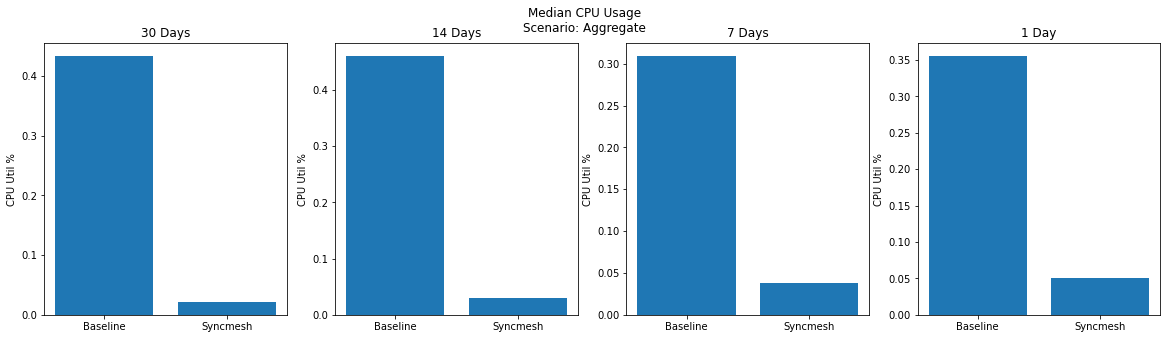

In [48]:
experiments = {}

# Sliding window:
n = 2
base_windows = [base_timings[i:i+n] for i in range(len(base_timings)-n+1)]
sync_windows = [sync_timings[i:i+n] for i in range(len(sync_timings)-n+1)]

i = 0
for base_window, sync_window in zip(base_windows, sync_windows):
    # experiment = {}
    print(base_window)
    df_base_window = df_base.loc[str(base_window[0]):str(base_window[1])]
    df_sync_window = df_sync.loc[str(sync_window[0]):str(sync_window[1])]
    # print(df_base_window.info())
    experiments[i] = {}
    experiments[i]["baseAggregateCPU"] =  df_base_window["cpu"].mean()
    experiments[i]["syncAggregateCPU"] =  df_sync_window["cpu"].mean()
    i += 1

# timedfbaseline.info()
print(experiments)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,5))
cases = ['Baseline', 'Syncmesh']
values1 = [experiments[4]["baseAggregateCPU"], experiments[4]["syncAggregateCPU"]]
values2 = [experiments[5]["baseAggregateCPU"], experiments[5]["syncAggregateCPU"]]
values3 = [experiments[6]["baseAggregateCPU"], experiments[6]["syncAggregateCPU"]]
values4 = [experiments[7]["baseAggregateCPU"], experiments[7]["syncAggregateCPU"]]
fig.suptitle('Median CPU Usage\nScenario: Aggregate')
ax1.bar(cases,values1)
ax1.set_title('30 Days')
ax1.set_ylabel("CPU Util %")
# ax1.set_yticklabels([to_human_readable(v) if v >= 0 else ' ' for v in  
#                     ax.get_yticks(minor=False)])
ax2.bar(cases,values2)
ax2.set_title('14 Days')
ax2.set_ylabel("CPU Util %")
# ax2.set_yticklabels([to_human_readable(v) if v >= 0 else ' ' for v in  
                    # ax.get_yticks(minor=False)])
ax3.bar(cases,values3)
ax3.set_title('7 Days')
ax3.set_ylabel("CPU Util %")
# ax3.set_yticklabels([to_human_readable(v) if v >= 0 else ' ' for v in  
                    # ax.get_yticks(minor=False)])
ax4.bar(cases,values4)
ax4.set_title('1 Day')
ax4.set_ylabel("CPU Util %")
# ax4.set_yticklabels([to_human_readable(v) if v >= 0 else ' ' for v in  
                    # ax.get_yticks(minor=False)])
# ax.set_ylabel("Bytes")
# ax.set_xlabel("Time")
fig.savefig("out/cpu_comparison_aggregate.png")
plt.show()

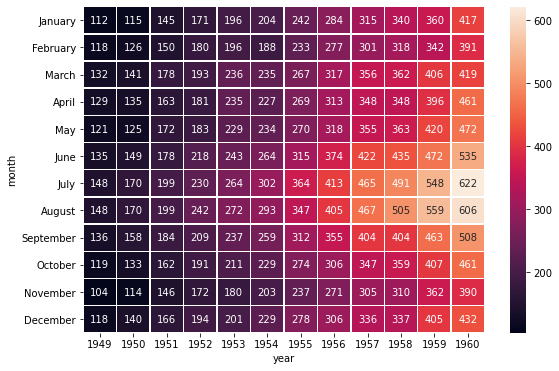

In [ ]:
# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)